In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
from glob import glob
import cv2
import skimage
from skimage.transform import resize
from PIL import Image
import h5py

In [2]:
train_dir = './data/chest_xray/train/'
test_dir = './data/chest_xray/test/'

In [3]:
# Bacterial Pneumonia images
# glob class is to iterate all jpeg images in the directory and make a list of all image paths
b_images = glob(train_dir + '/bacteria/*.jpeg')

In [4]:
# Viral pneumonia images
v_images = glob(train_dir + '/virus/*.jpeg')

In [5]:
# Normal images
n_images = glob(train_dir + '/normal/*.jpeg')

Text(0.5, 1.0, 'Class Distribution')

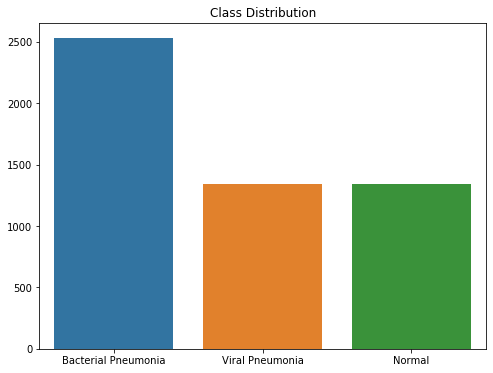

In [6]:
# Plot the class distribution
plt.figure(figsize=(8,6))
sns.barplot(['Bacterial Pneumonia', 'Viral Pneumonia', 'Normal'],[len(b_images),len(v_images), len(n_images)])
plt.title('Class Distribution')

In [12]:
img_class = []
height = []
weight = []

# Iterate through each image path
for d in os.listdir(train_dir):
        # find height and width of all train images
        for image in train_images:
                img_class.append(d)
                img_array = np.array(Image.open(image))
                height.append(img_array.shape[0])
                weight.append(img_array.shape[1])


# save image sizes to data frame
size_df = pd.DataFrame({
    'class': img_class,
    'height': height,
    'width': weight
})

Text(0.5, 1.0, 'Image Size Distribution')

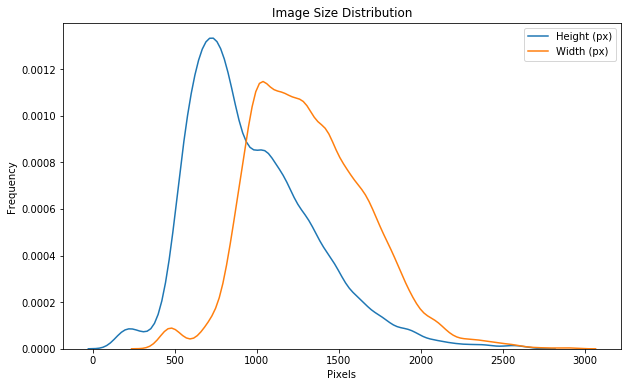

In [13]:
plt.figure(figsize = (10, 6))

sns.kdeplot(
    size_df['height'], label='Height (px)')
sns.kdeplot(
    size_df['width'], label='Width (px)')

plt.xlabel('Pixels')
plt.ylabel('Frequency')
plt.title('Image Size Distribution')

Text(0.5, 1.0, 'Class Distribution')

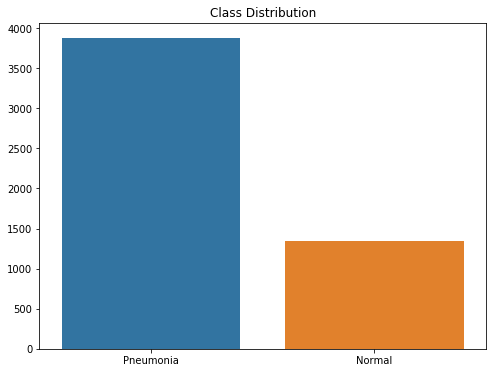

In [12]:
plt.figure(figsize=(8,6))
sns.barplot(['Pneumonia', 'Normal'],[len(pneu_images), len(norm_images)])
plt.title('Class Distribution')

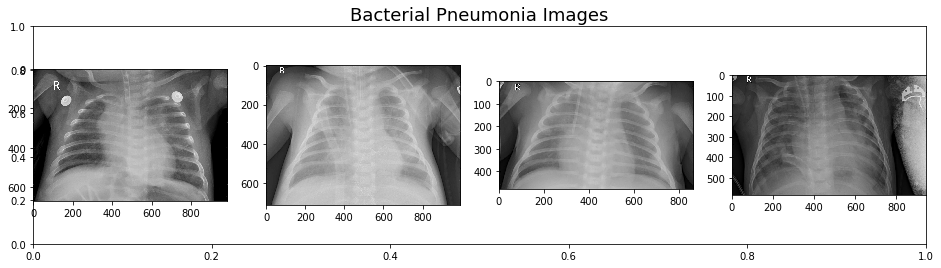

In [22]:
fig=plt.figure(figsize=(16, 4))
plt.title('Bacterial Pneumonia Images', fontsize=18)
cols = 4
rows = 1
for i in range(1, cols*rows +1):
    img = np.asarray(plt.imread(b_images[i]))
    fig.add_subplot(rows, cols, i)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

In [15]:
img_class = []
height = []
weight = []

for d in os.listdir(train_dir):
    for image in train_images:
        img_class.append(d)
        img_array = np.array(Image.open(image))
        height.append(img_array.shape[0])
        weight.append(img_array.shape[1])
        
size_df = pd.DataFrame({
    'class': img_class,
    'height': height,
    'width' : weight
})

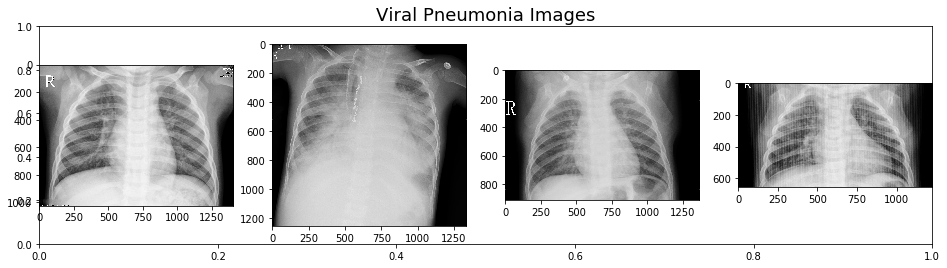

In [18]:
fig=plt.figure(figsize=(16, 4))
plt.title('Viral Pneumonia Images', fontsize=18)
cols = 4
rows = 1
for i in range(1, cols*rows +1):
    img = np.asarray(plt.imread(v_images[i]))
    fig.add_subplot(rows, cols, i)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

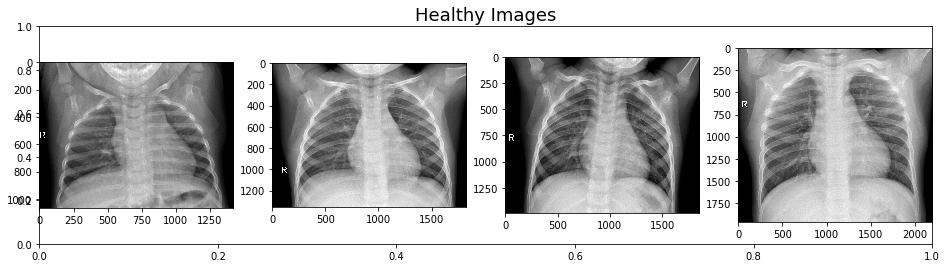

In [19]:
fig=plt.figure(figsize=(16, 4))
plt.title('Healthy Images', fontsize=18)
cols = 4
rows = 1
for i in range(1, cols*rows +1):
    img = np.asarray(plt.imread(n_images[i]))
    fig.add_subplot(rows, cols, i)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

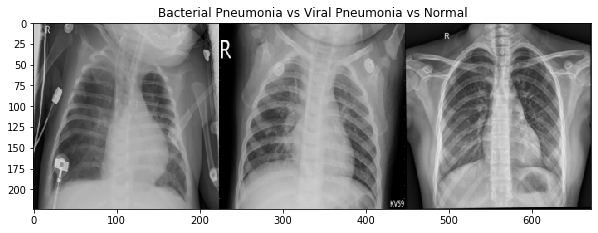

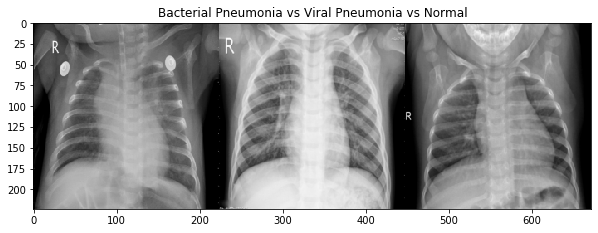

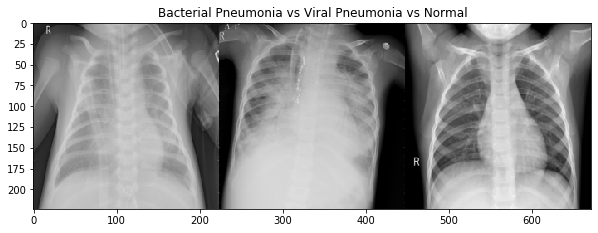

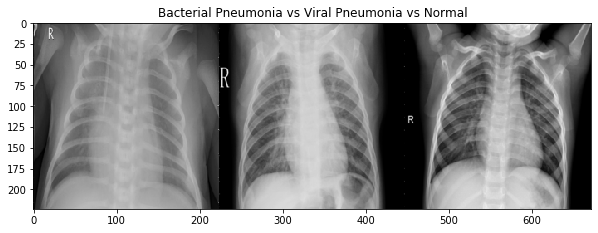

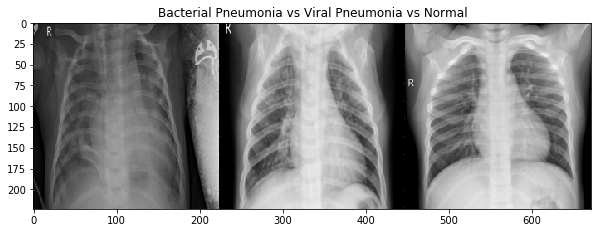

In [20]:
def pair_plot(index, img1_list, img2_list, img3_list):
    image1 = skimage.transform.resize(cv2.imread(img1_list[index]), (224, 224, 3))
    image2 = skimage.transform.resize(cv2.imread(img2_list[index]), (224, 224, 3))
    image3 = skimage.transform.resize(cv2.imread(img3_list[index]), (224, 224, 3))
    pair = np.concatenate((image1, image2, image3), axis=1)
    plt.figure(figsize=(10,8))
    plt.title("Bacterial Pneumonia vs Viral Pneumonia vs Normal")    
    plt.imshow(pair)
    plt.show()
    
for x in range(5):
    pair_plot(x, b_images, v_images, n_images)